# Introducing Scikit-Learn
![](https://scikit-learn.org/stable/_static/ml_map.png)

![](https://static.wixstatic.com/media/7c7bd7_6633580062624b5bbf192eb2df22a428~mv2.png/v1/fit/w_566,h_202,al_c,q_80/file.png)
One of the best known Python machine learning libraries is [Scikit-Learn](http://scikit-learn.org):
* Clean, uniform, and streamlined API
* Useful and complete online documentation.
> Once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.
* This section provides an overview of the Scikit-Learn API.

## Data Representation in Scikit-Learn
### Data as table
![](https://web.stanford.edu/class/cs101/table.png)

For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.

In general, we will refer to the rows of the matrix as ***samples***, and the number of rows as **``n_samples``**.
Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.

In general, we will refer to the columns of the matrix as ***features***, and the number of columns as **``n_features``**.

We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set()
%matplotlib inline
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Features matrix
* By convention, this features matrix is often stored in a variable named ```X```.
* The **features matrix** is assumed to be two-dimensional, with shape **```[n_samples, n_features]```**
* The **features matrix** is most often contained in a **NumPy ```array```** or a **Pandas ```DataFrame```**
* Some Scikit-Learn models also accept **SciPy sparse matrices**.

### Target array
* By convention we will usually call ```y```.
* Usually one dimensional, with length ```n_samples```, and is generally contained in a **NumPy array** or **Pandas ```Series```**.
* The target array may have continuous numerical values, or discrete classes/labels.

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

<IPython.core.display.Javascript object>


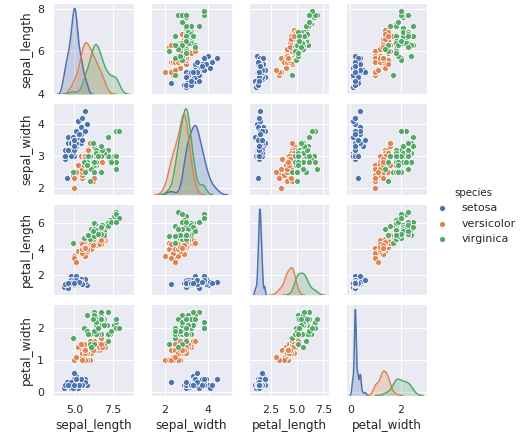

In [39]:
sns.pairplot(iris, hue='species', size=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations.

In [40]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [41]:
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:
![](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.02-samples-features.png)

## Scikit-Learn's Estimator API

The **Scikit-Learn API** is designed with the following guiding principles:

- ***Consistency***: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- ***Inspection***: All specified parameter values are exposed as public attributes.

- ***Limited object hierarchy***: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.

- ***Composition***: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- ***Sensible defaults***: When models require user-specified parameters, the library defines an appropriate default value.

> **In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.**

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
   
![](https://slideplayer.com/slide/15760442/88/images/7/Basic+API+estimator.fit%28X%2C+%5By%5D%29+estimator.predict+estimator.transform.jpg)

### Supervised learning example: Simple linear regression

<IPython.core.display.Javascript object>


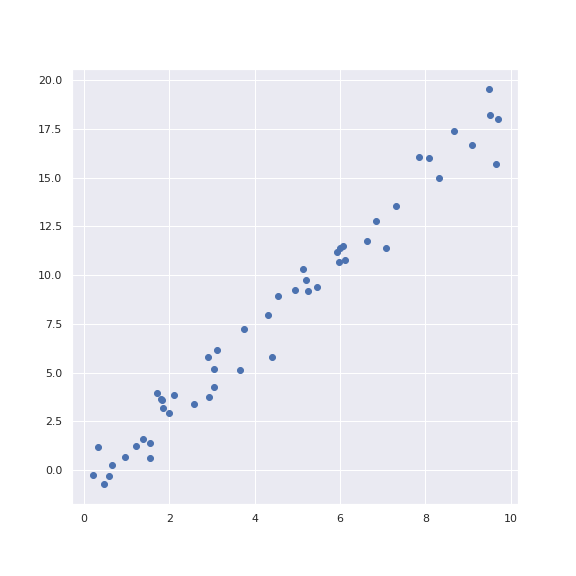

In [42]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(x, y);

#### 1. Choose a class of model

In [43]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

* IMPORTANT: ***a class of model is not the same as an instance of a model***.
* Depending on the model class we are working with, we might need to answer one or more questions like the following:
    - Would we like to fit for the offset (i.e., *y*-intercept)?
    - Would we like the model to be normalized?
    - Would we like to preprocess our features to add model flexibility?
    - What degree of regularization would we like to use in our model?
    - How many model components would we like to use?
* These important choices must be made ***once the model class is selected***.
* These choices are often represented as ***hyperparameters***, or parameters that must be set before the model is fit to data.
* In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
* For our linear regression example, we can instantiate the ```LinearRegression``` class and specify that we would like to fit the intercept using the ```fit_intercept``` hyperparameter:

In [44]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between ***choice of model*** and ***application of model to data***.

#### 3. Arrange data into a features matrix and target vector
* **Scikit-Learn data representation**:
    - a two-dimensional features matrix
    - a one-dimensional target array
* Here our target variable ```y``` is already in the correct form (a length-```n_samples``` array), but we need to massage the data ```x``` to make it a matrix of size ```[n_samples, n_features]```.
* In this case, this amounts to a simple **reshaping** of the one-dimensional array:

In [45]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data
This can be done with the ``fit()`` method of the model:

In [46]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* This ``fit()`` command causes a number of model-dependent internal computations to take place
* The results of these computations are stored in model-specific attributes that the user can explore.
* In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have **trailing underscores**; for example in this linear model, we have the following:

In [47]:
#the slope: close to 2
model.coef_

array([1.9776566])

In [48]:
#the intercept: close to -1
model.intercept_

-0.9033107255311164

#### 5. Predict labels for unknown data
In Scikit-Learn, this can be done using the ``predict()`` method.

In [49]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [50]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

<IPython.core.display.Javascript object>


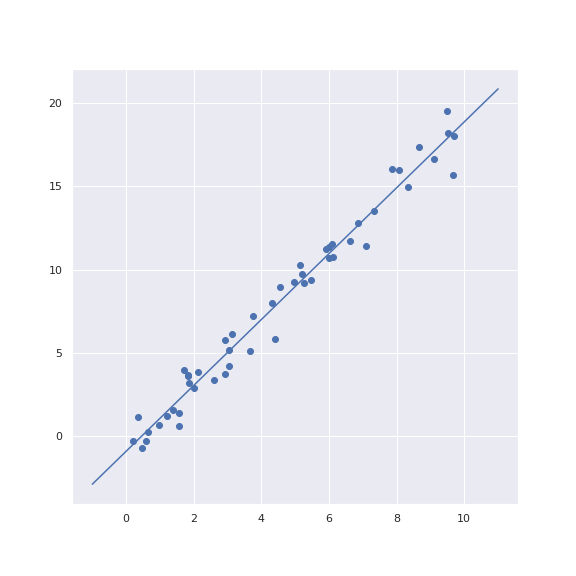

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

### Supervised learning example: Iris classification
* Given a model trained on a portion of the Iris data, how well can we predict the remaining labels?
* For this task, we will use an extremely simple generative model known as **Gaussian Naive Bayes**, which proceeds by assuming each class is drawn from an axis-aligned **Gaussian/Normal distribution** (will discuss **Naive Bayes Classification** for more details later).
* Because it is so fast and has no hyperparameters to choose, **Gaussian Naive Bayes** is often a good model to use as a **baseline** classification, before exploring whether improvements can be found through more sophisticated models.

![](https://www.researchgate.net/profile/Yune_Lee/publication/255695722/figure/fig8/AS:341300424527882@1458383770548/Illustration-of-how-a-Gaussian-Naive-Bayes-GNB-classifier-works-For-each-data-point.png)

* We would like to evaluate the model on data it has not seen before, and so we will split the data into a ***training set*** and a ***testing set***.

![](https://miro.medium.com/max/1466/1*aNPC1ifHN2WydKHyEZYENg.png)

In [52]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [53]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality reduction
* Reduce the dimensionality of the Iris data so as to more easily visualize it.
    - Recall that the Iris data is four dimensional: there are four features recorded for each sample.
* **Dimensionality reduction**: whether there is a suitable **lower-dimensional representation** that retains the essential features of the data.
* Often **dimensionality reduction** is used as an aid to visualizing data: 
    - After all, it is much easier to plot data in two dimensions than in four dimensions or higher!
* Here we will use **Principal Component Analysis (PCA)**, a fast **linear dimensionality reduction technique**.
* We will ask the model to return two components—that is, a two-dimensional representation of the data.

![](https://lh6.googleusercontent.com/proxy/3PZWdYFTdEK49Wpf0Za7zNMTz56gCt-FYhhrcD7hTdgHz_QbPL1zJdp5wV2hKyFsagsA8Z3ukBpjmUFKAj01g3PnKmVCEzWEuoKIy6DtttdBd2aopy49_t2VXJrW4V576bOfs5roVD8XNtlcz37WqWShKfmYcJRDct_NhzzpO6PI6S6MMyaOMT8Q-GshW91WqAW88i0I-QWole1Nfq-ND6Cu4w3_pwGRX8KYHjNQhl0E8ekb2hxXi3qpICJAZapmEhju)

In [55]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results.
We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

<IPython.core.display.Javascript object>


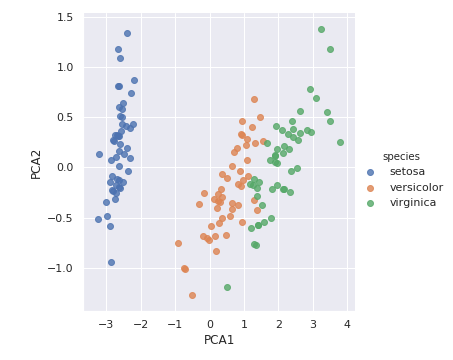

In [56]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris clustering
* **Clustering**: find distinct groups of data without reference to any labels.
* Here we will use a powerful clustering method called a **Gaussian Mixture Model (GMM)**.
* A **GMM** attempts to model the data as a collection of **Gaussian blobs**.

![](https://miro.medium.com/max/1506/1*lTv7e4Cdlp738X_WFZyZHA.png)

In [77]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')         # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                           # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)               # 4. Determine cluster labels
y_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

<IPython.core.display.Javascript object>


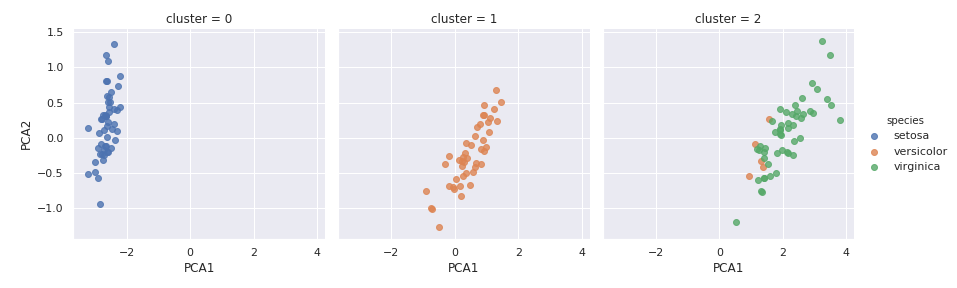

In [78]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', col_wrap=3, fit_reg=False, size = 4, aspect=1);

* How well the GMM algorithm has recovered the underlying label: 
    - the ***setosa*** species is separated perfectly within cluster 0
    - there remains a small amount of mixing between ***versicolor*** and ***virginica***.
* This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!

## Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

<IPython.core.display.Javascript object>


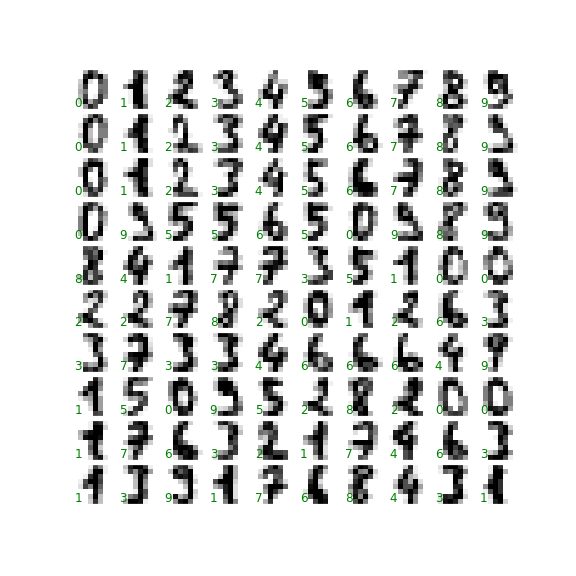

In [23]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

* In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
* We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
* Additionally, we need the target array, which gives the previously determined label for each digit.
* These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap*, and transform the data to two dimensions:

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

<IPython.core.display.Javascript object>


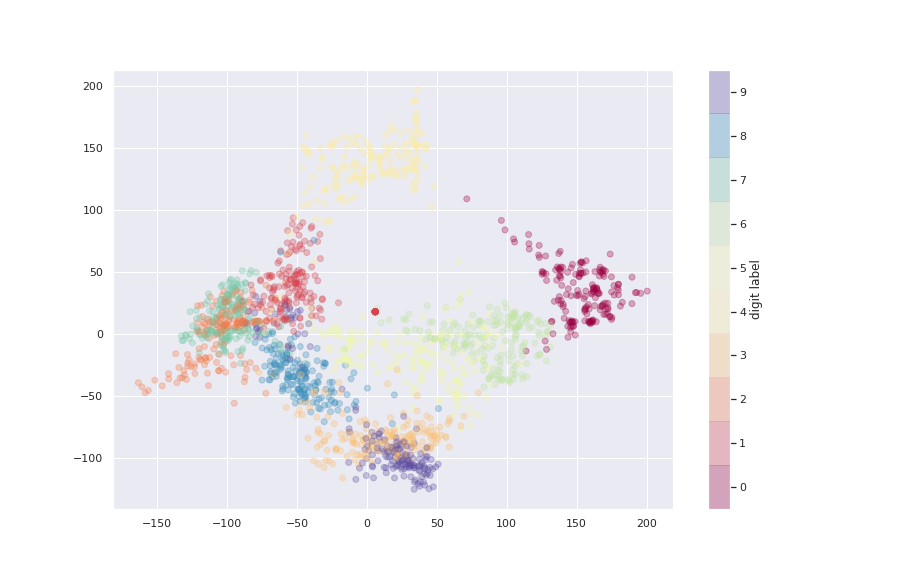

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            #edgecolor='none',
            alpha=0.3,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

* This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. 
* For example, zeros and ones have very little overlap in parameter space.
* Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
* On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.
* Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a **Gaussian Naive Bayes** model:

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

* With even this extremely simple model, we find about 80% accuracy for classification of the digits!
* However, this single number doesn't tell us ***where*** we've gone wrong—one nice way to do this is to use the ***confusion matrix***, which we can compute with Scikit-Learn and plot with Seaborn:

<IPython.core.display.Javascript object>


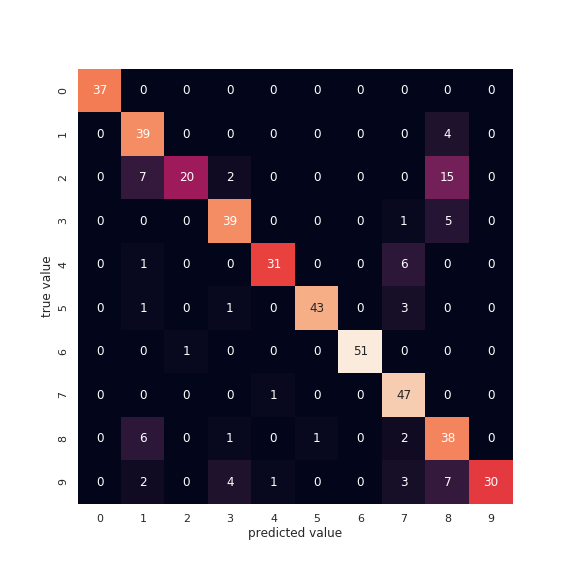

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

* This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
* Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
* We'll use green for correct labels, and red for incorrect labels:

<IPython.core.display.Javascript object>


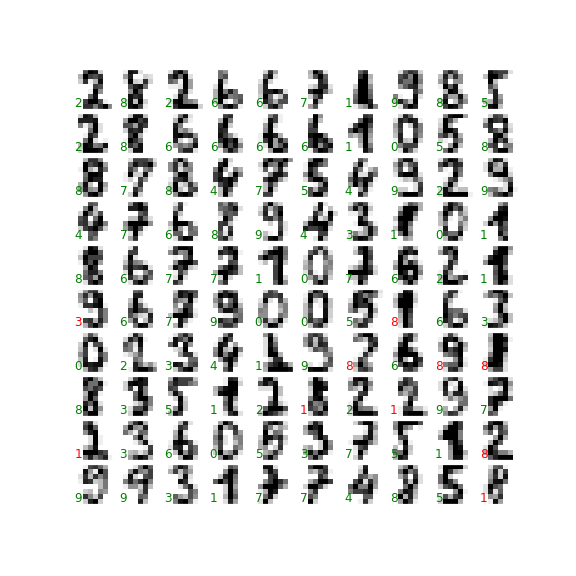

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines, random forests or another classification approach.

## Summary

In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API.
Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.
Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.